In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import expon
from scipy import integrate

In [2]:
file = '../Data/Sesion4/MediaMovilData.csv'

In [10]:
data = pd.read_csv(file)
x = data.Ventas
x

0     1250
1     1150
2      970
3     1100
4     1170
5     1080
6     1120
7     1230
8     1210
9     1050
10    1030
11     990
12    1160
13    1200
14    1180
15    1260
16    1230
17    1190
Name: Ventas, dtype: int64

In [11]:
(1250+1150+970)/3

1123.3333333333333

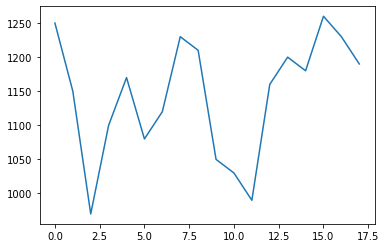

In [5]:
plt.plot(x)

In [52]:
def GetMediaMovil(x,n):
    
    
    media = np.zeros( x.shape[0]+1 )
    
    
    for i in range( len(x)+1 ):
        
        sum_ = 0.
        
        if i >= n:
        
            for j in range( i-n, i):
                
                sum_ += x[j]
            
            media[i] = sum_/n
                
            #print(i, media)
        
        else:
            media[i] = x[i]
            
    return media
            

In [57]:
media = GetMediaMovil(x,3)

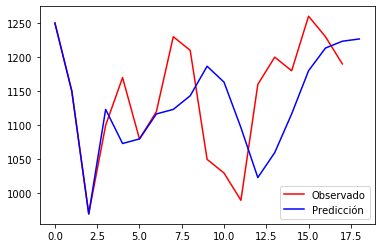

In [58]:
plt.plot(x,color='r',label='Observado')
plt.plot(media,color='b',label='Predicción')
plt.legend()

In [59]:
def GetError(x,y):
    
    error = np.abs( x-y )
    return np.mean(error)

In [60]:
GetError(x,media[-1])

90.92592592592597

In [142]:
w = np.array([0.37817095, 0.13705862, 0.48419468])

In [143]:
def GetWeightedMediaMovil(x,n,w):
    
    
    media = np.zeros( x.shape[0]+1 )
    
    
    for i in range( len(x)+1 ):
        
        sum_ = 0.
        
        if i >= n:
        
            kk = 0
            for j in range( i-n, i):
                
                sum_ += x[j]*w[kk]
               # print(kk,w[kk])
                kk += 1
                
        
            media[i] = sum_
                
            #print(i, media)
        
        else:
            media[i] = x[i]
            
    return media

In [144]:
mediapesada = GetWeightedMediaMovil(x,3,w)

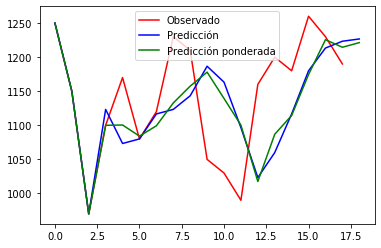

In [145]:
plt.plot(x,color='r',label='Observado')
plt.plot(media,color='b',label='Predicción')
plt.plot(mediapesada,color='g',label='Predicción ponderada')
plt.legend()

In [146]:
GetError(x,mediapesada[-1])

87.92731599999999

In [147]:
GetError(x,media[-1])

90.92592592592597

In [148]:
np.abs(x-mediapesada[-1])

0      28.730831
1      71.269169
2     251.269169
3     121.269169
4      51.269169
5     141.269169
6     101.269169
7       8.730831
8      11.269169
9     171.269169
10    191.269169
11    231.269169
12     61.269169
13     21.269169
14     41.269169
15     38.730831
16      8.730831
17     31.269169
Name: Ventas, dtype: float64

# Distribucion exponencial

In [151]:
sigma_poblacional = 3
mean = expon.mean( scale = sigma_poblacional )
std = expon.std( scale = sigma_poblacional )

In [150]:
mean

3.0

In [152]:
std

3.0

In [153]:
x = np.linspace(0,20,100)
y = expon.pdf( x, scale = sigma_poblacional  )

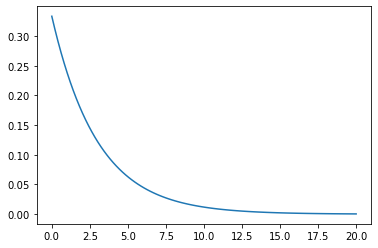

In [154]:
plt.plot(x,y)

In [165]:
M = expon.rvs( size = 1000, scale = sigma_poblacional )

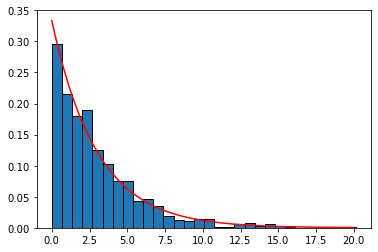

In [169]:
plt.plot(x,y,color='r')
plt.hist(M,density=True,ec='k', bins=30);

In [168]:
np.std(M)

2.8789804144207425